
# <center>**HR аналитика**

- Задача №1 - построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
- Задача №2 - построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


    Заказчик предоставил данные с признаками:
        - id — уникальный идентификатор сотрудника;
        - dept — отдел, в котором работает сотрудник;
        - level — уровень занимаемой должности;
        - workload — уровень загруженности сотрудника;
        - employment_years — длительность работы в компании (в годах);
        - last_year_promo — показывает, было ли повышение за последний год;
        - last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
        - supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
        - salary — ежемесячная зарплата сотрудника;
        - job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


**Порядок работы:**

- Задача №1: предсказание уровня удовлетворённости сотрудника
        
    - Шаг 1. Загрузка данных
    - Шаг 2. Предобработка данных
    - Шаг 3. Исследовательский анализ данных
    - Шаг 4. Подготовка данных
    - Шаг 5. Обучение моделей
    - Шаг 6. Оформление выводов


- Задача 2: предсказание увольнения сотрудника из компании

    - Шаг 1. Загрузка данных
    - Шаг 2. Предобработка данных
    - Шаг 3. Исследовательский анализ данных
    - Шаг 4. Добавление нового входного признака
    - Шаг 5. Подготовка данных
    - Шаг 6. Обучение модели


- Шаг 7. Выводы



In [1]:
!pip install phik
!pip install shap
#!pip install ydata_profiling

In [2]:
!pip install --upgrade scikit-learn

In [3]:
# Актуализируем библиотеки для корректной работы кода (раскомментировать 'yes', если нужно обновить)
upgrade = 'no'
#upgrade = 'yes'
if upgrade == 'yes':
    !pip install --upgrade scipy
    !pip install --upgrade scikit-learn
    #!pip install --upgrade matplotlib
    

In [4]:
# Импортируем библиотеки 
import pandas as pd
import numpy as np

import phik
import shap

from matplotlib import pyplot as plt
import seaborn as sns
# Загружаем нужные метрики
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
import scipy. stats as stats
# Загружаем нужные преобразователи данных
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
#
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# Загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [5]:
# Функция для графиков распределения по столбцам
def plots(table,legend=True):
    for column in table.columns:
        if table[column].dtypes != 'object' :
            if column != 'id':
                fig = plt.figure(figsize=(20,5))
                plt.subplot(1,2, 1)
                sns.histplot(data=table, x=column,legend=legend,kde=True)
                plt.title(f'Распределение, {column}')
                plt.ylabel('Частота')
                plt.xlabel(column)
                plt.subplot(1,2, 2)
                sns.boxplot(data=table, y=column)
                plt.title(f'Боксплот, {column}')
                plt.show()
    display(table.describe())

# Функция для графиков распределения по столбцам категориальных признаков
def plots_cat(table,filters):
    for column in table.columns:
        if table[column].dtypes == 'object':
            fig = plt.figure(figsize=(10,5))
            sns.histplot(data=table, y=column, hue=filters,kde=True)
            display(table.pivot_table(index=column, aggfunc='mean'))
            plt.ylabel(column)
            plt.xlabel('Частота')
            plt.show()
            
def plots_hist(table,filters,filters1,filters2,legend=True):
    for column in table.columns:
        if table[column].dtypes != 'object' :
            if column != 'id':
                fig = plt.figure(figsize=(21,5))
                plt.subplot(1,3, 1)
                sns.histplot(data=table, x=column, hue=filters,legend=legend,stat='density', common_norm=False,kde=True)
                plt.title(f'Распределение, {column}')
                plt.ylabel('Плотность распределения')
                plt.xlabel(column)
                plt.subplot(1,3, 2)
                sns.histplot(data=table, x=column, hue=filters1,stat='density', common_norm=False,legend=legend,kde=True)
                plt.title(f'Распределение, {column}')
                plt.ylabel('Плотность распределения')
                plt.xlabel(column)
                plt.subplot(1,3, 3)
                sns.histplot(data=table, x=column, hue=filters2,stat='density', common_norm=False,legend=legend,kde=True)
                plt.title(f'Распределение, {column}')
                plt.ylabel('Плотность распределения')
                plt.xlabel(column)
                plt.show()
    display(table.describe())

def plot_hist(table,filters,legend=True):
    for column in table.columns:
        if table[column].dtypes != 'object' :
            if column != 'id':
                fig = plt.figure(figsize=(10,5))
                sns.histplot(data=table, x=column, hue=filters,legend=legend,kde=True)
                plt.title(f'Распределение, {column}')
                plt.ylabel('')
                plt.xlabel(column)
                
def pie_plots(table):
    tables = table[table.columns]
    tables = tables.dropna()
    for column in tables.columns:
        if column != 'id':
            if table[column].dtypes == 'object' :
                data = tables[column].value_counts()
                fig = plt.figure(figsize=(5,5))
                plt.pie(data,colors = sns.color_palette('pastel'),autopct='%1.0f%%')
                plt.title(f'Распределение, {column}')
                plt.axis('equal')
                plt.show()
                display(data)
def pies(table):
    tables = table[table.columns]
    tables = tables.dropna()
    for column in tables.columns:
        if column in ['employment_years','supervisor_evaluation']:
                data = tables[column].value_counts()
                fig = plt.figure(figsize=(5,5))
                plt.pie(data,colors = sns.color_palette('pastel'),autopct='%1.0f%%')
                plt.title(f'Распределение, {column}')
                plt.axis('equal')
                plt.show()
                display(data)
                
def filter_hist(table,target_fl):
    table_date = table.loc[table['quit']==target_fl]
    sns.histplot(data = table_date, x='job_satisfaction_rate')
    plt.xlabel('Уровень удовлетворённости сотрудника работой')
    plt.title(f'Уровень удовлетворённости сотрудника работой в компании c quit == {target_fl}')
    plt.show()
 


## Загружаем данные ##

### Сохраним таблицы и посмотрим описание

In [6]:
# Загружаем данные
try:
    train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    X_test = pd.read_csv('/datasets/test_features.csv')
    y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    train = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    X_test = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    y_test = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

table_list = [train, X_test, y_test] # Список таблиц
for i in table_list:
    display(i.head(3))
    display(i.info())
    

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

### Вывод по первому шагу ###
- Выполнили загрузку данных в трех таблицах:
        таблица 1, содержит 4000 строк и 10 столбцов, 6 пропусков в столбце dept и 4 пропуска в столбце level
        таблица 2, содержит входные признаки тестовой выборки, 2000 строк и 9 столбцов, 2 пропусков в столбце dept и 1 пропуска в столбце level
        таблица 3, содержит целевой признак тестовой выборки, 2000 строк и 1 столбец

на первый взгляд данные выглядят корректно, можно продолжать анализ

## Предобработка данных ##


In [7]:
train = train.set_index('id')
X_test = X_test.set_index('id')
y_test = y_test.set_index('id');

### Статистика

In [8]:
for table in table_list:
    display(table.info())
    display(table.describe())
    print(f'Число явных дубликатов = {table.duplicated().sum()}')
    print();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Число явных дубликатов = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Число явных дубликатов = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


Число явных дубликатов = 0



In [9]:
# Изучим корректность сначений в строковых столбцах и проверим наличие неявных дубликатов
for table in table_list:
    for column in table.columns:
        if table[column].dtypes=='object':
            print(f'{table[column].unique()}- Уникальные значения в столбце ({column})')
            print();

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]- Уникальные значения в столбце (dept)

['junior' 'middle' 'sinior' nan]- Уникальные значения в столбце (level)

['medium' 'high' 'low']- Уникальные значения в столбце (workload)

['no' 'yes']- Уникальные значения в столбце (last_year_promo)

['no' 'yes']- Уникальные значения в столбце (last_year_violations)

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']- Уникальные значения в столбце (dept)

['junior' 'middle' 'sinior' nan]- Уникальные значения в столбце (level)

['medium' 'low' 'high' ' ']- Уникальные значения в столбце (workload)

['no' 'yes']- Уникальные значения в столбце (last_year_promo)

['no' 'yes']- Уникальные значения в столбце (last_year_violations)



In [10]:
X_test.loc[X_test['dept'] == ' ', 'dept'] = np.nan
X_test.loc[X_test['workload'] == ' ', 'workload'] = np.nan
train.loc[train['level'] == 'sinior', 'level'] = 'senior'
X_test.loc[X_test['level'] == 'sinior', 'level'] = 'senior'

### Вывод
- выполнили предобработку данных: 
    - Удалил явные дубликаты
    - неявные дубликаты в строковых столбцах также, отсутствуют
    
- подготовили данные к дальнешему анализу

## Исследовательский анализ данных



In [11]:
display(train.head(5));

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


### Анализ количественных признаков 

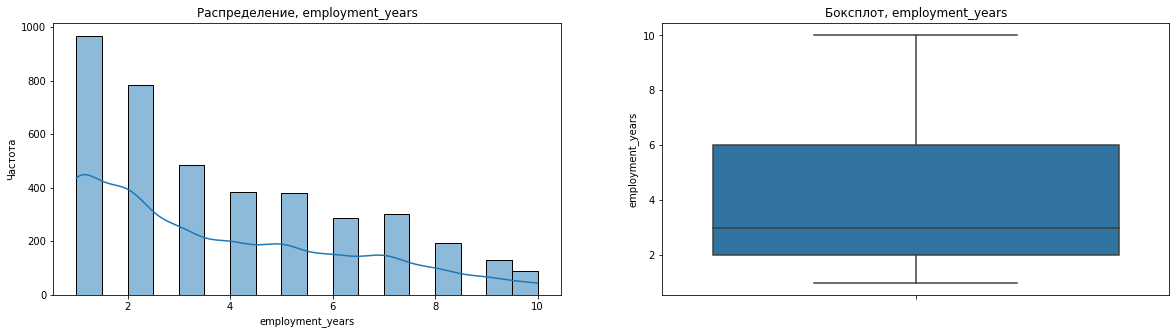

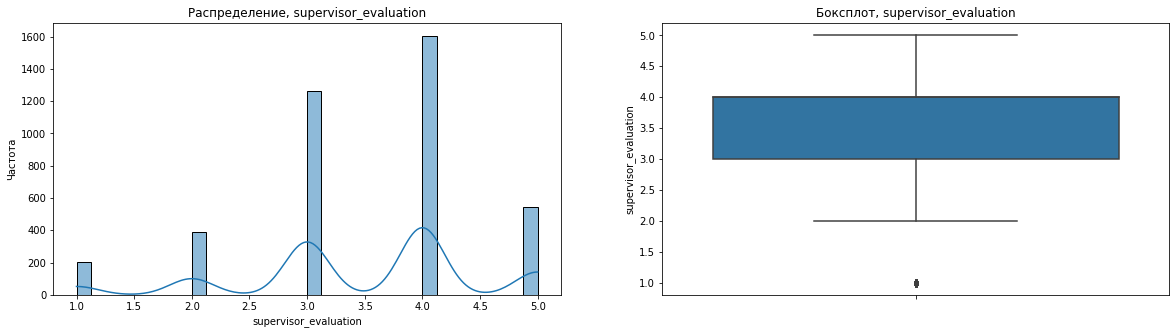

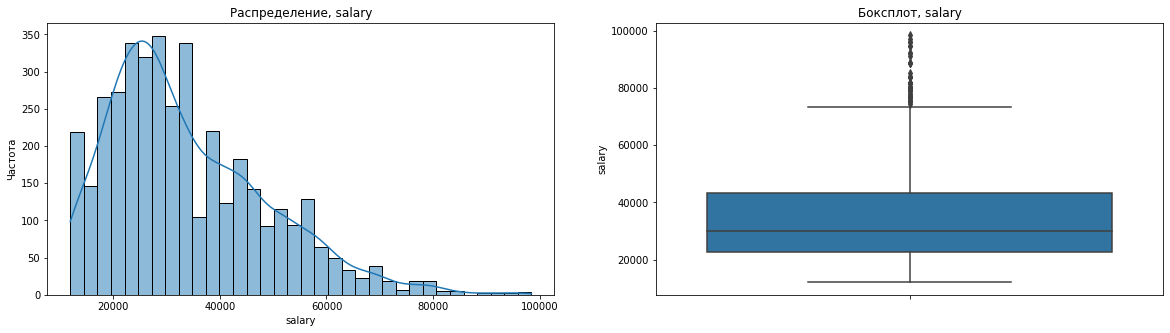

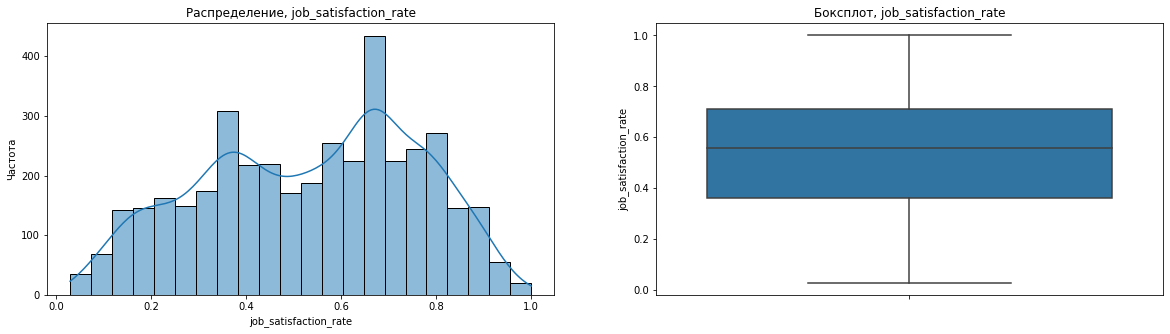

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [12]:
plots(train,legend=True);

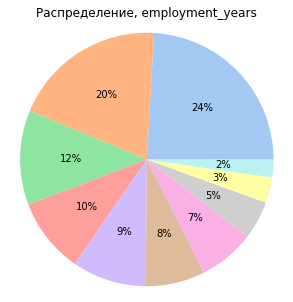

1     961
2     785
3     480
4     383
5     379
7     301
6     287
8     193
9     130
10     91
Name: employment_years, dtype: int64

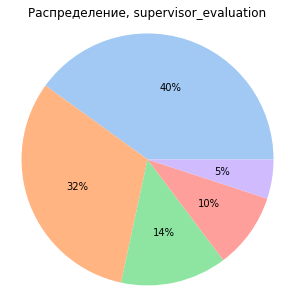

4    1597
3    1261
5     544
2     387
1     201
Name: supervisor_evaluation, dtype: int64

In [13]:
pies(train);

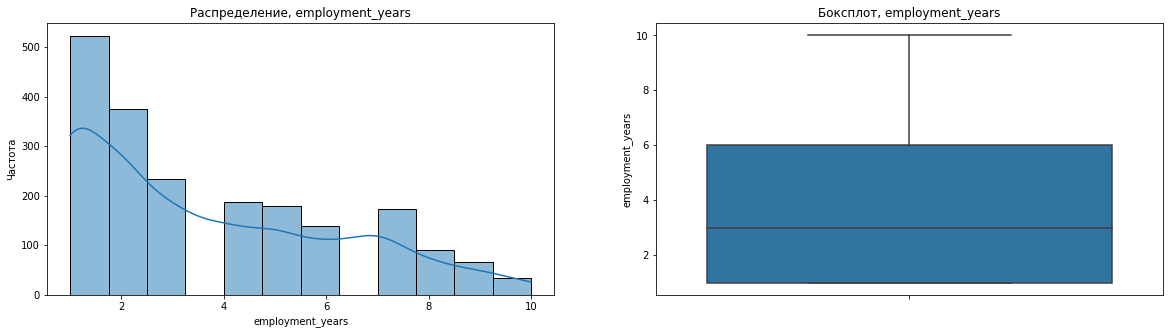

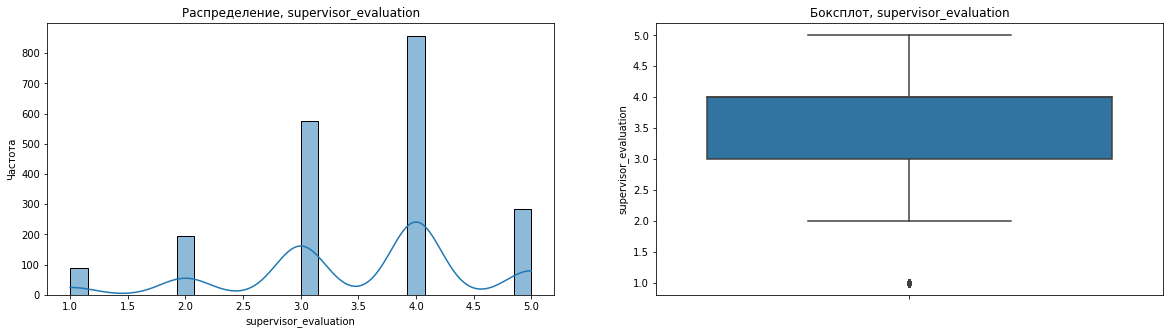

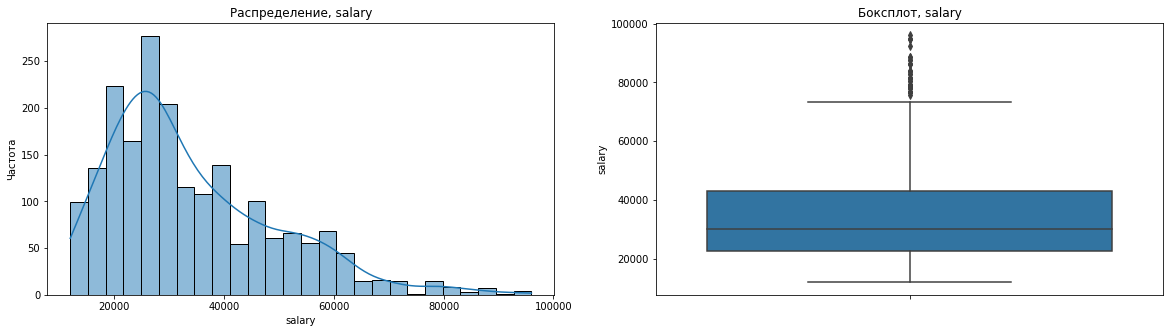

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [14]:
plots(X_test,legend=True);

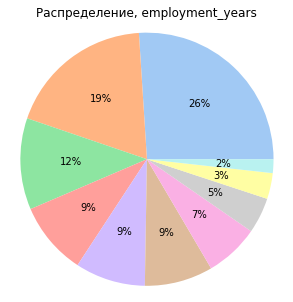

1     519
2     374
3     233
4     186
5     179
7     174
6     138
8      91
9      66
10     35
Name: employment_years, dtype: int64

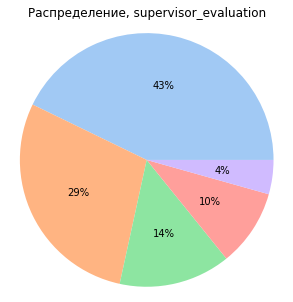

4    854
3    574
5    284
2    196
1     87
Name: supervisor_evaluation, dtype: int64

In [15]:
pies(X_test);

#### Вывод ####
 - На графиках по количественным признакам в таблице с обучающей выборкой, можем наблюдать: 
         - некоторые аномальные значения в столбце с зарплатами, со смещением нормали влево
         - оценку работадателя нужно рассматривать как категориальный порядковый признак
 - На графиках по количественным признакам в таблице с тестовой выборкой, можем наблюдать:
         - ситуация аналогичная первой таблице, что логично, так как обучающая и тестовая выборка будут похожи

### Графики с дополнительными фильтрами по категориям###

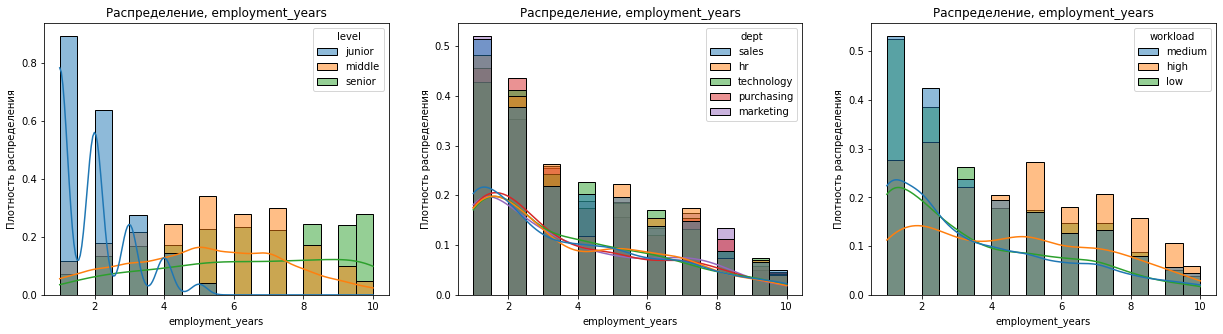

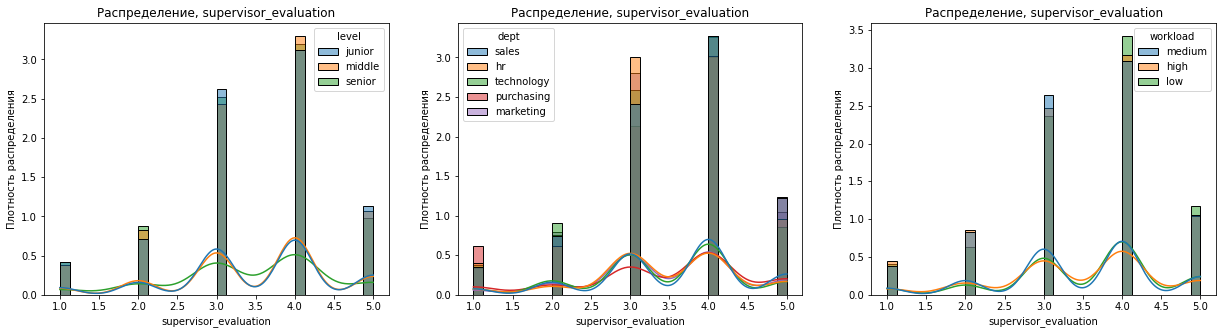

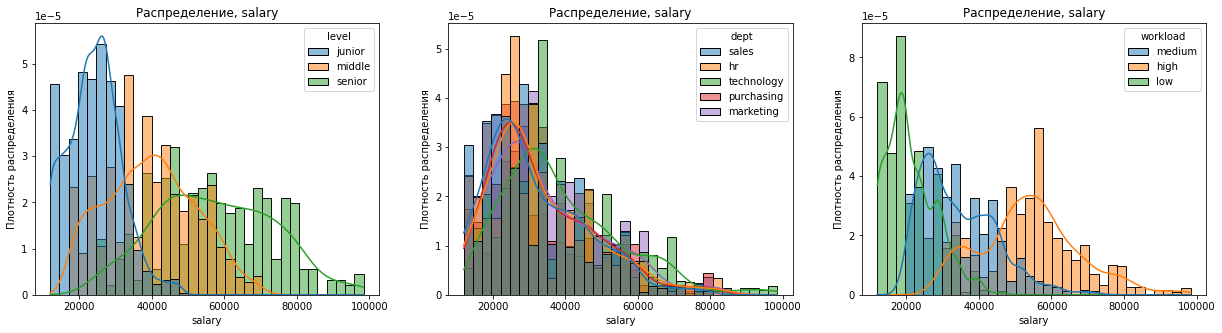

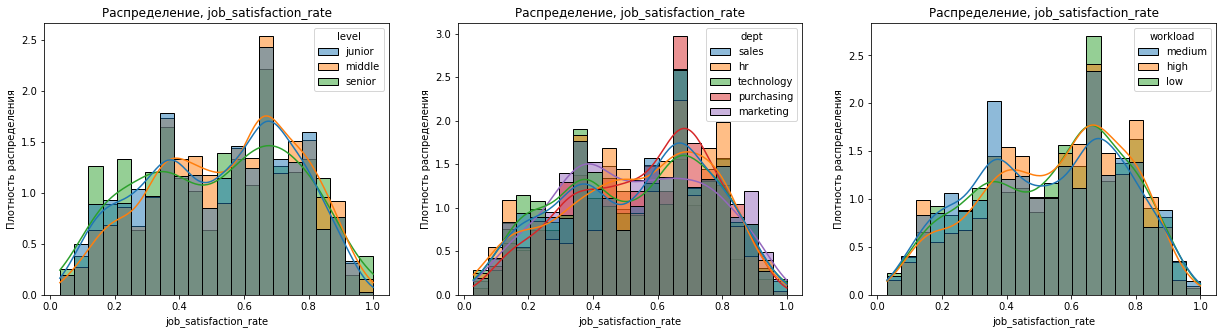

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [16]:
plots_hist(train,filters ='level',filters1 ='dept',filters2 ='workload',legend=True);

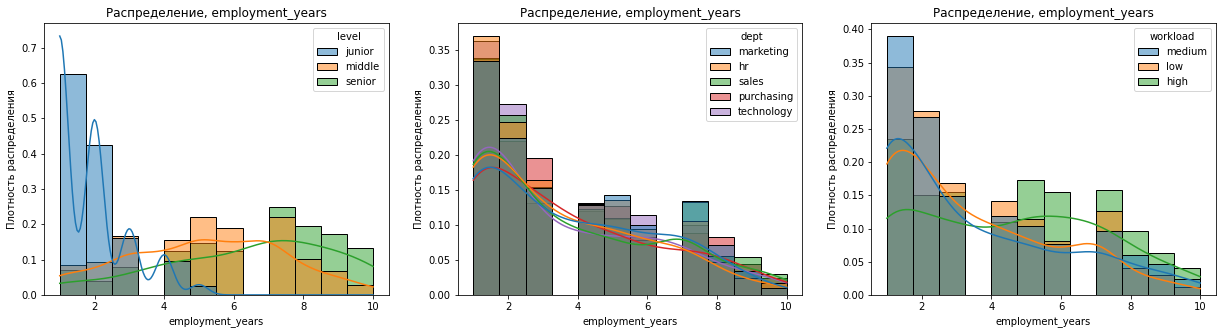

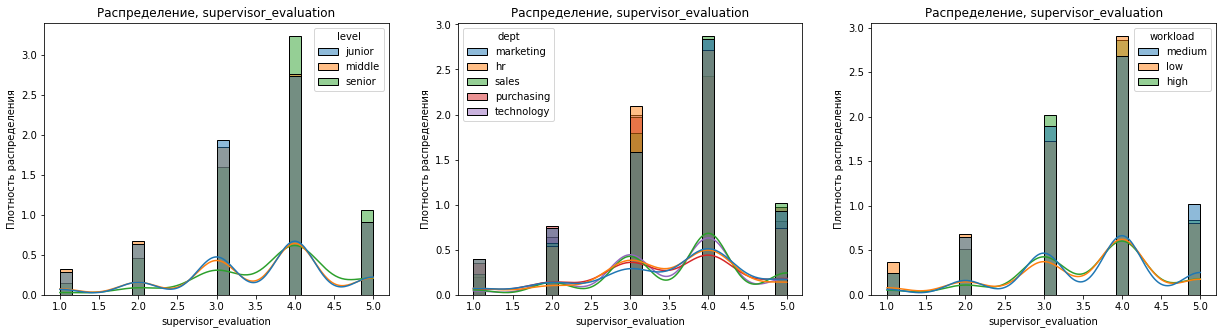

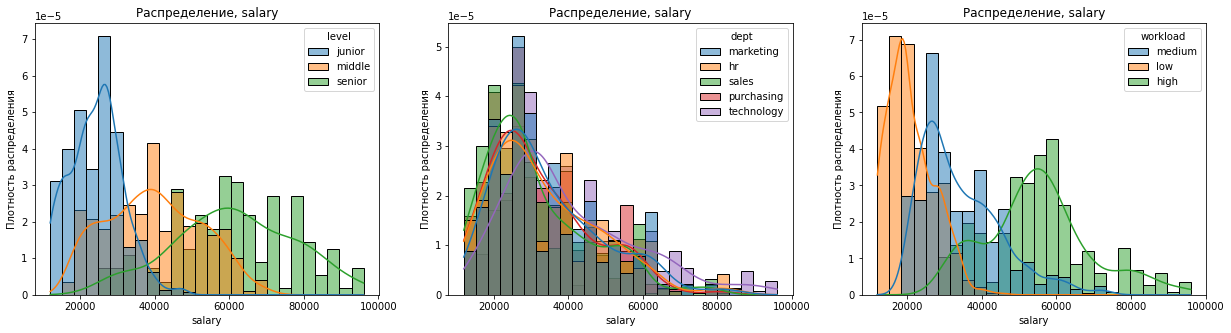

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [17]:
plots_hist(X_test,filters ='level',filters1 ='dept',filters2 ='workload',legend=True);

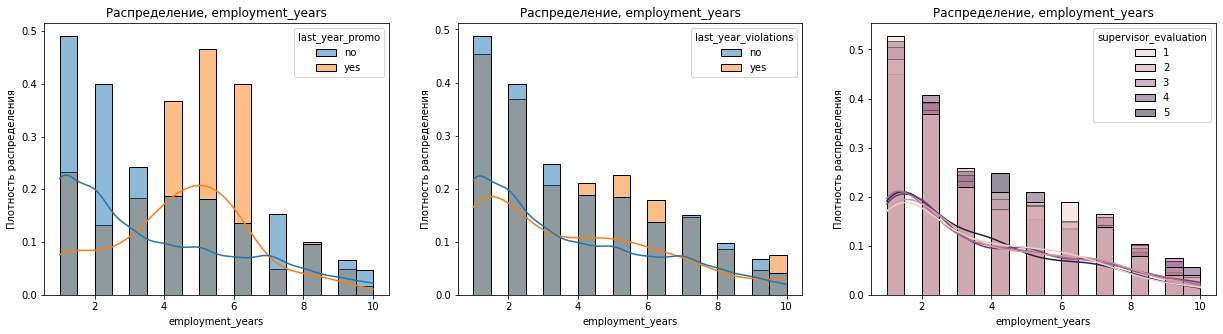

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


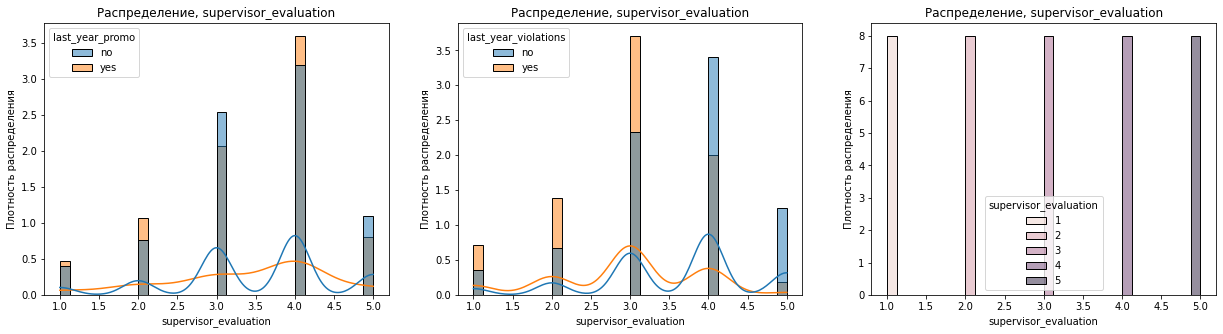

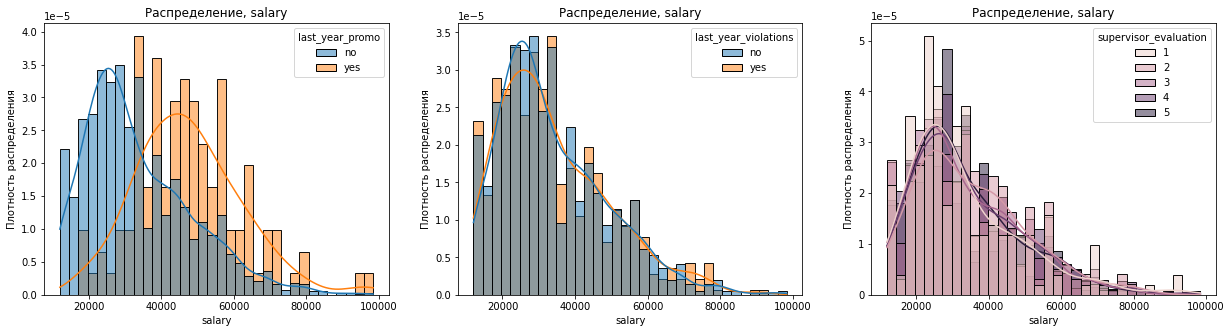

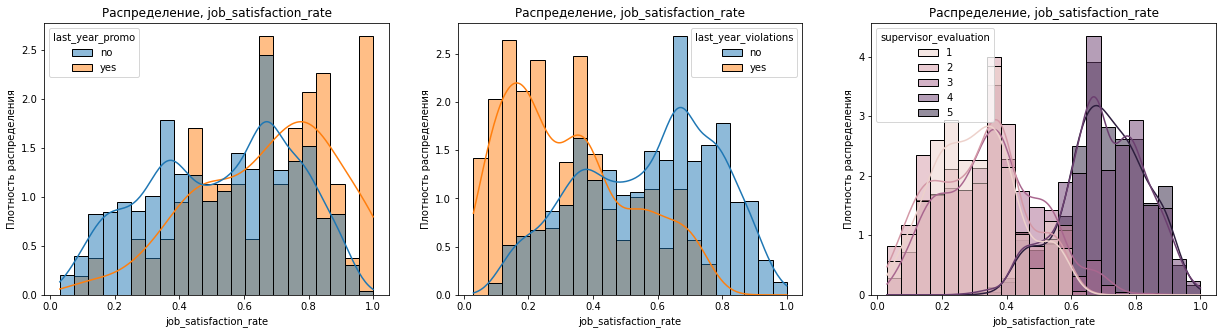

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [18]:
plots_hist(train,filters ='last_year_promo',filters1 ='last_year_violations',filters2 ='supervisor_evaluation',legend=True);

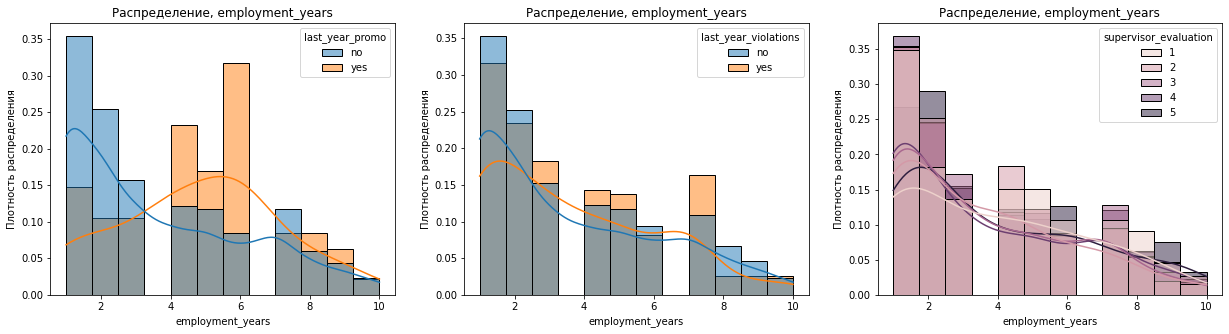

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


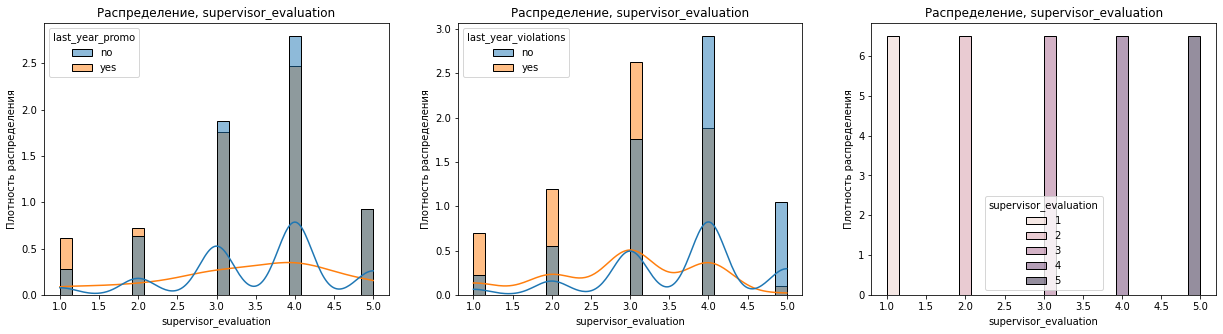

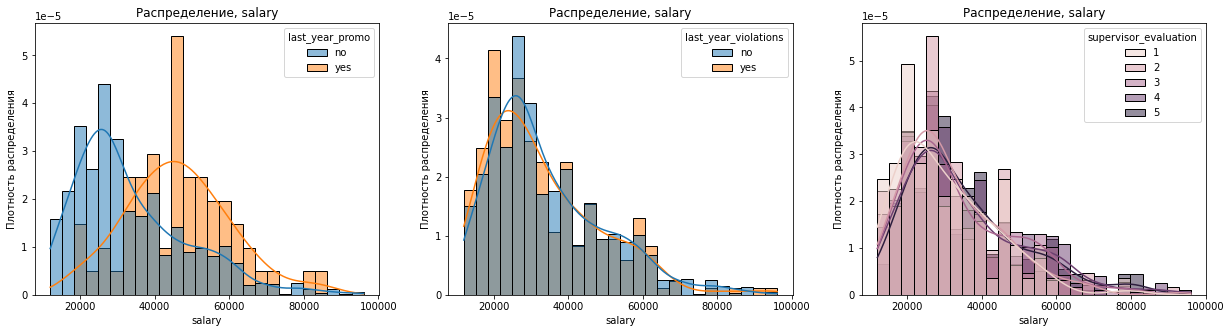

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [19]:
plots_hist(X_test,filters ='last_year_promo',filters1 ='last_year_violations',filters2 ='supervisor_evaluation',legend=True);

#### Вывод ####
- Цветом выделил разные категории сотрудников: 
        - по отделам
        - по должности
        - по нагрузке
        - по повышению зарплаты
        - по оценке от работодателя
- видно что распределения в тренировочной и тестовой выборке также коррелируют и категории соответствуют друг другу


### Графики для категориальных данных ###

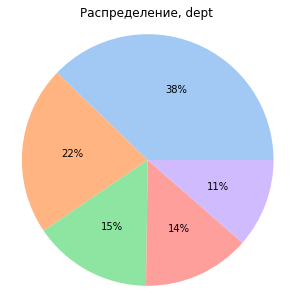

sales         1508
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

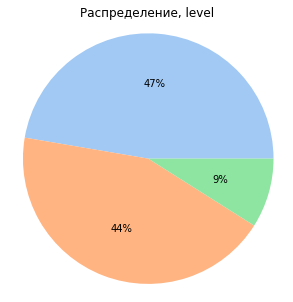

junior    1888
middle    1744
senior     358
Name: level, dtype: int64

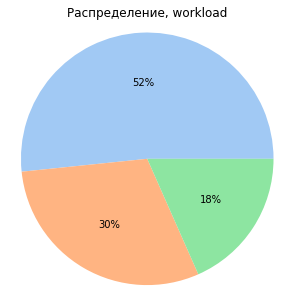

medium    2060
low       1197
high       733
Name: workload, dtype: int64

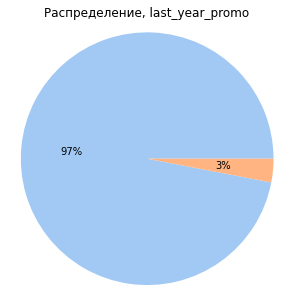

no     3870
yes     120
Name: last_year_promo, dtype: int64

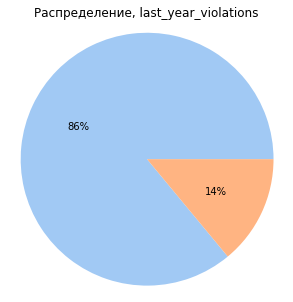

no     3432
yes     558
Name: last_year_violations, dtype: int64

In [20]:
pie_plots(train);

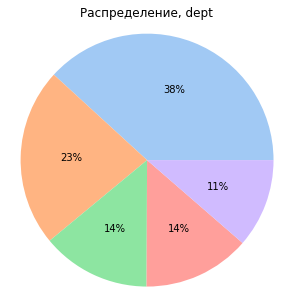

sales         762
technology    455
marketing     278
purchasing    273
hr            227
Name: dept, dtype: int64

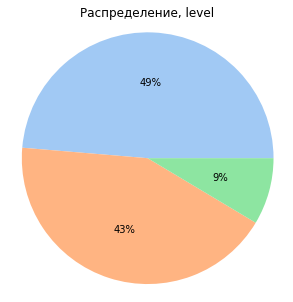

junior    971
middle    853
senior    171
Name: level, dtype: int64

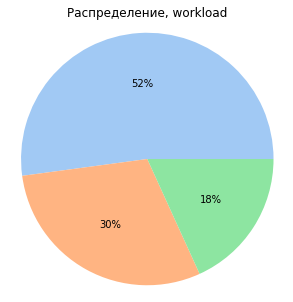

medium    1040
low        592
high       363
Name: workload, dtype: int64

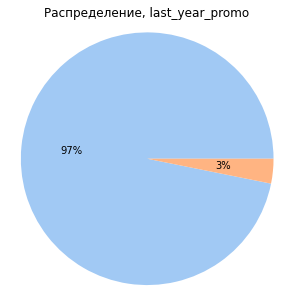

no     1932
yes      63
Name: last_year_promo, dtype: int64

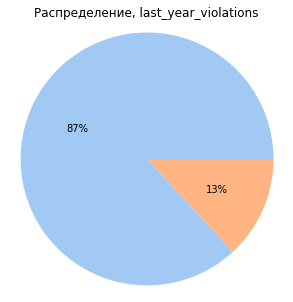

no     1733
yes     262
Name: last_year_violations, dtype: int64

In [21]:
pie_plots(X_test);

#### Вывод ####


- Самый большой отдел продаж
- больше всего молодых специалистов
- больше половины сотрудников имеют высокий уровень нагрузки
- 3 процента сотрудников получают повышение
- чуть больше 10% сотрудников нарушают дисциплину





### Корреляционный анализ ###

#### Фик матрица 

In [22]:
display(train.phik_matrix(interval_cols = [ 'salary', 'job_satisfaction_rate']).style.background_gradient(cmap ='coolwarm'));

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.282265,0.082086
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.717630,0.080620
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.788820,0.056128
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.483419,0.325603
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.215025,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.010078,0.560348
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.282265,0.717630,0.788820,0.483419,0.215025,0.010078,0.000000,1.000000,0.165830
job_satisfaction_rate,0.082086,0.080620,0.056128,0.325603,0.190803,0.560348,0.764364,0.165830,1.000000


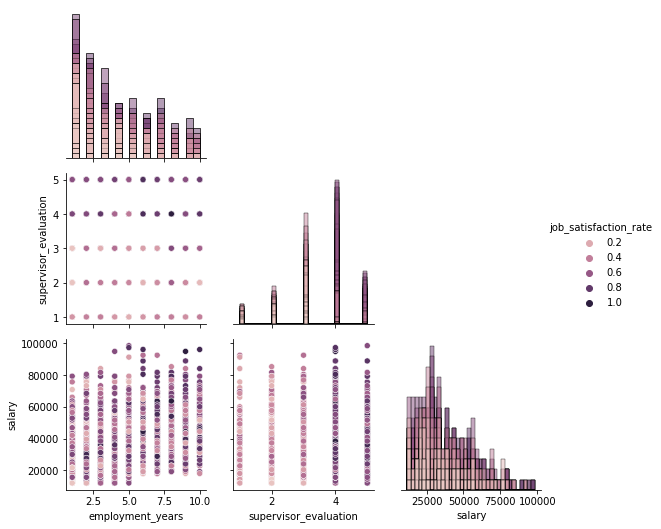

In [23]:
g = sns.PairGrid(train, hue="job_satisfaction_rate",diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

#### Вывод ####
- некоторые колонки имеют хорошую связь с. оценкой удовлетворенности, что говорит о том что мы можем применять МО, 
- мультиколлениарности не обнаружено


- для стобцов employment_years, salary применим MinMaxScaler либо StandartScaler
- для столбцов supervisor_evaluation, level, workload  применим OrdinalEncoder
- для столбцов dept, last_year_promo, last_year_violations применим OneHotEncoder

## Подготовка данных ##

### Категории признаков

In [24]:
train.duplicated().sum()
train = train.drop_duplicates()
train.shape


ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary','supervisor_evaluation']
RANDOM_STATE = 50


y = train['job_satisfaction_rate']
X = train.drop(['job_satisfaction_rate'], axis = 1);

### Пайплайн обработки данных

In [25]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first',handle_unknown='ignore')
        )
    ]
)  ;

In [26]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)  ;

In [27]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)  ;

### Вывод ###
- Выполнил подготовку данных с помощью пайплайна
- можно приступать к обучению моделей

## Обучение модели

### Настройка финального пайплайна

In [28]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
]);

In [29]:
params = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None] + [i for i in range(2, 7)],
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]; 

### Создаем метрику

In [30]:
def smape_score(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

smape_scorer = make_scorer(smape_score, greater_is_better = False);

### Подбор гиперпараметров

In [31]:
grid_search = GridSearchCV(pipe_final,
                           params,
                           cv=5,
                           scoring=smape_scorer,
                           n_jobs=-1)
display(grid_search.fit(X, y));

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImput...
                          'models__max_depth': [None, 2, 3, 4, 5, 6],
                          'models__min_samples_split': range(2, 10),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape_score, greater_is_better=False, response_method='predict'))

In [32]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке при кроссвалидации:', round(-grid_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

#### Вывод ####
- лучшая модель  DecisionTreeRegressor(min_samples_split=8, random_state=50), метрика на кроссвалидации 14.98

### Применение лучшей модели

In [33]:
y_test = y_test.sort_index()
X_test = X_test.sort_index();

In [34]:
y_predict = grid_search.predict(X_test);

In [35]:
smape_score(np.array(y_test['job_satisfaction_rate']), y_predict)

13.557846108642421

In [36]:
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X, y)

print(dummy_mean.predict(X_test))
print(y_test.mean())


[0.53255393 0.53255393 0.53255393 ... 0.53255393 0.53255393 0.53255393]
job_satisfaction_rate    0.54878
dtype: float64


In [37]:
smape_score(y_test['job_satisfaction_rate'], dummy_mean.predict(X_test))

38.26225790202238

## Вывод по задаче №1 ##
- С помощью пайплайна перебрали разные модели и гиперпараметры,
- создали новую метрику
- лучшей моделью является DecisionTreeRegressor(min_samples_split=8, random_state=50)
- лучшшая метрика на кроссвалидации меньше 15
- метрика на тестовой выборке 13.66

## **Задача №2** ##
## Загружаем данные ##

### Сохраним таблицы и посмотрим описание


In [38]:
# Загружаем данные
try:
    train2 = pd.read_csv('/datasets/train_quit.csv')
    X_test2 = pd.read_csv('/datasets/test_features.csv')
    y_test2 = pd.read_csv('/datasets/test_target_quit.csv.csv')
except:
    train2 = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    X_test2 = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    y_test2 = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

table_list2 = [train2, X_test2, y_test2] # Список таблиц
for i in table_list2:
    display(i.head(3))
    display(i.info())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,quit
0,999029,yes
1,372846,no
2,726767,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

### Вывод по первому шагу ###
- Выполнили загрузку данных в трех таблицах:
        таблица 1, содержит 4000 строк и 10 столбцов
        таблица 2, содержит входные признаки тестовой выборки, 2000 строк и 9 столбцов, 2 пропусков в столбце dept и 1 пропуска в столбце level
        таблица 3, содержит целевой признак тестовой выборки, 2000 строк и 1 столбец

на первый взгляд данные выглядят корректно, можно продолжать анализ

## Предобработка данных ##


### Статистика

In [39]:
train2 = train2.set_index('id')
X_test2 = X_test2.set_index('id')
y_test2 = y_test2.set_index('id')

In [40]:
for table in table_list2:
    display(table.info())
    display(table.describe())
    print(f'Число явных дубликатов = {table.duplicated().sum()}')
    print();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


Число явных дубликатов = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Число явных дубликатов = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id
count,2000.000000
mean,552765.213500
std,253851.326129
min,100298.000000
25%,339052.000000
50%,550793.000000
75%,765763.750000
max,999029.000000


Число явных дубликатов = 0



In [41]:
# Изучим корректность сначений в строковых столбцах и проверим наличие неявных дубликатов
for table in table_list2:
    for column in table.columns:
        if table[column].dtypes=='object':
            print(f'{table[column].unique()}- Уникальные значения в столбце ({column})')
            print()
;

['sales' 'purchasing' 'marketing' 'technology' 'hr']- Уникальные значения в столбце (dept)

['middle' 'junior' 'sinior']- Уникальные значения в столбце (level)

['high' 'medium' 'low']- Уникальные значения в столбце (workload)

['no' 'yes']- Уникальные значения в столбце (last_year_promo)

['no' 'yes']- Уникальные значения в столбце (last_year_violations)

['no' 'yes']- Уникальные значения в столбце (quit)

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']- Уникальные значения в столбце (dept)

['junior' 'middle' 'sinior' nan]- Уникальные значения в столбце (level)

['medium' 'low' 'high' ' ']- Уникальные значения в столбце (workload)

['no' 'yes']- Уникальные значения в столбце (last_year_promo)

['no' 'yes']- Уникальные значения в столбце (last_year_violations)

['yes' 'no']- Уникальные значения в столбце (quit)



''

In [42]:
X_test2.loc[X_test2['dept'] == ' ', 'dept'] = np.nan
X_test2.loc[X_test2['workload'] == ' ', 'workload'] = np.nan
train2.loc[train2['level'] == 'sinior', 'level'] = 'senior'
X_test2.loc[X_test2['level'] == 'sinior', 'level'] = 'senior'
;

''

### Вывод
- выполнили предобработку данных: 
    - Удалил явные дубликаты
    - неявные дубликаты в строковых столбцах также, отсутствуют
    - исправил опечатки
- подготовил данные к дальнешему анализу

## Исследовательский анализ данных


In [43]:
train2.head(5)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


### Анализ количественных признаков 

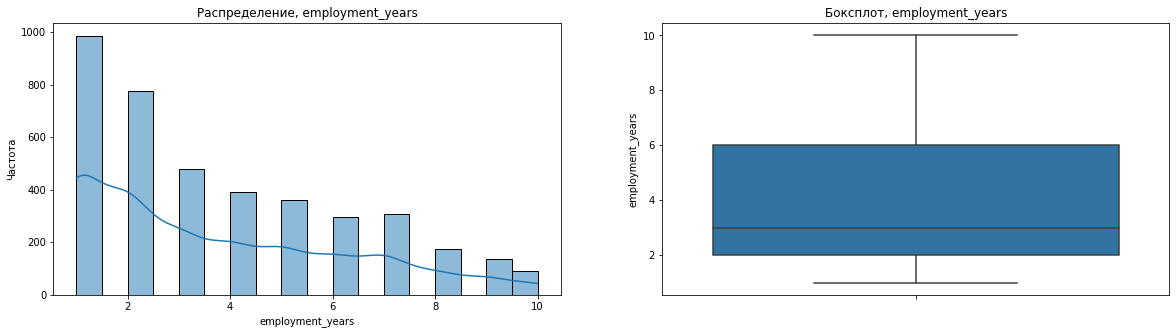

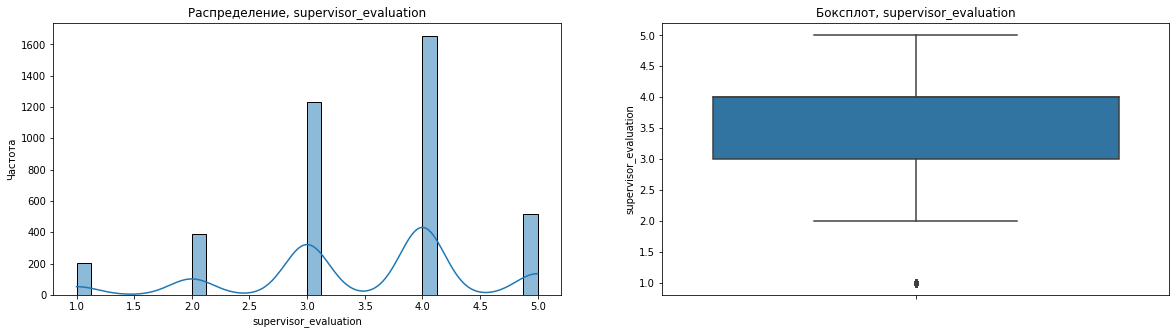

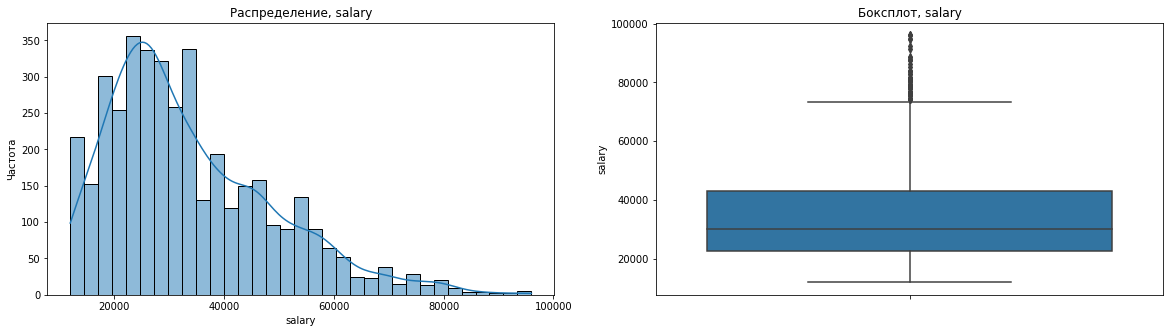

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [44]:
plots(train2,legend=True);

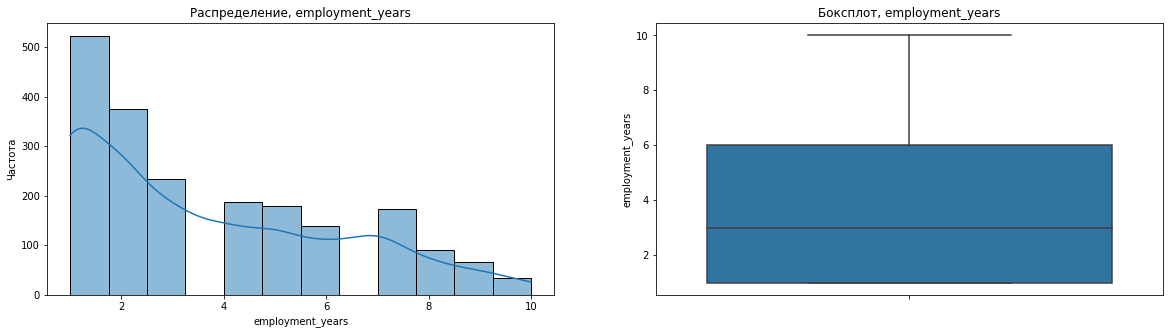

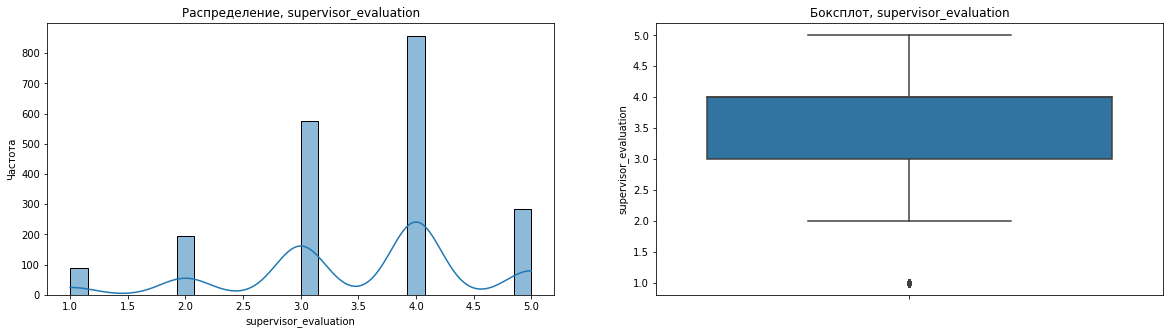

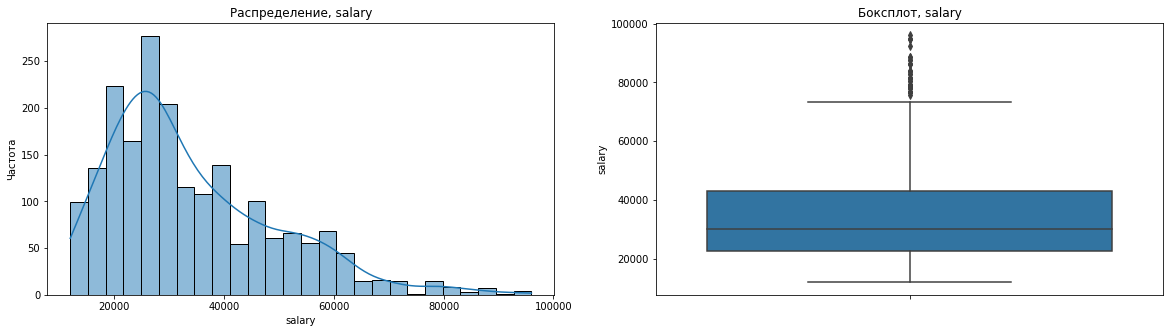

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [45]:
plots(X_test2,legend=True);

#### Вывод ####
 - На графиках по количественным признакам в таблице с обучающей выборкой, можем наблюдать: 
         - некоторые аномальные значения в столбце с зарплатами, со смещением нормали влево
 - На графиках по количественным признакам в таблице с тестовой выборкой, можем наблюдать:
         - ситуация аналогичная первой таблице, что логично, так как обучающая и тестовая выборка будут похожи

### Графики с дополнительными фильтрами по категориям ###

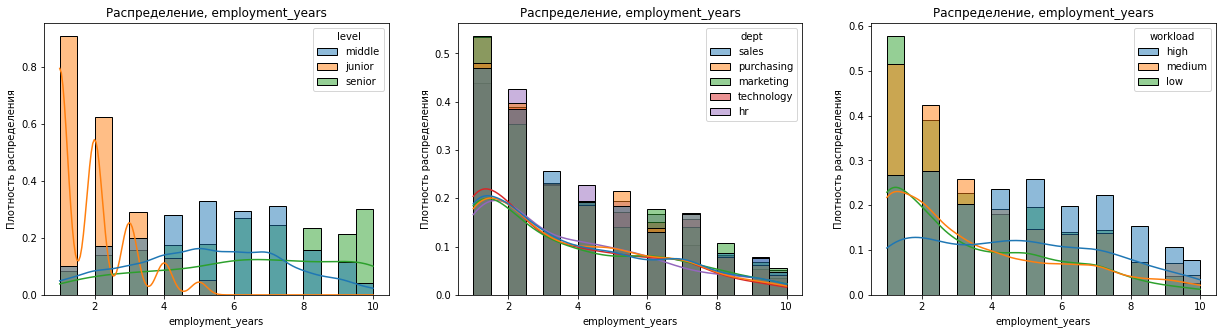

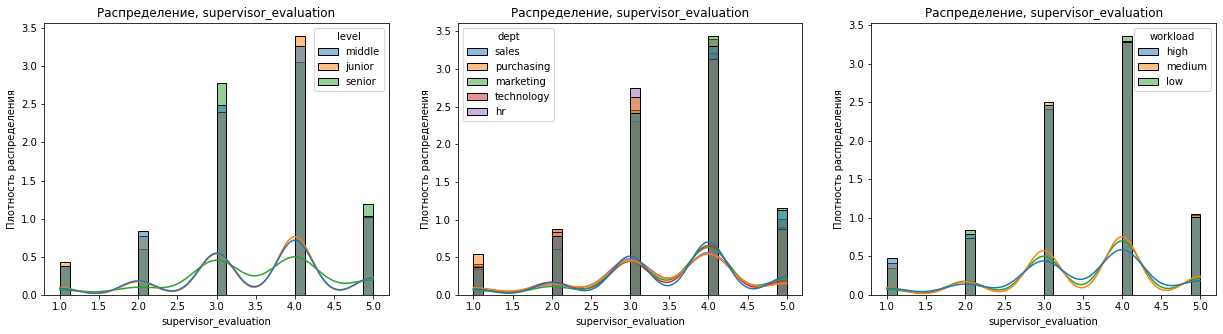

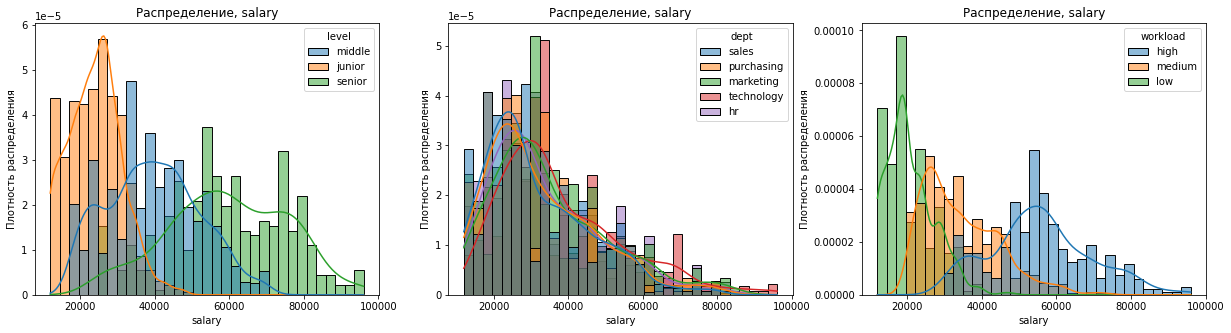

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [46]:
plots_hist(train2,filters ='level',filters1 ='dept',filters2 ='workload',legend=True);

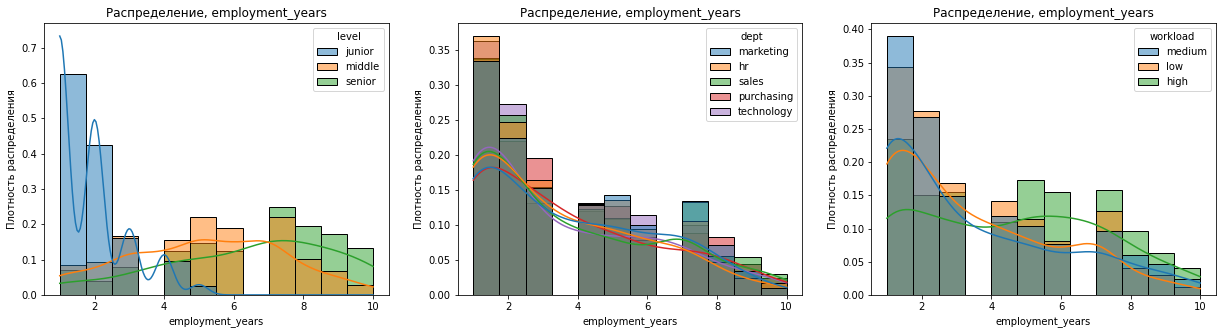

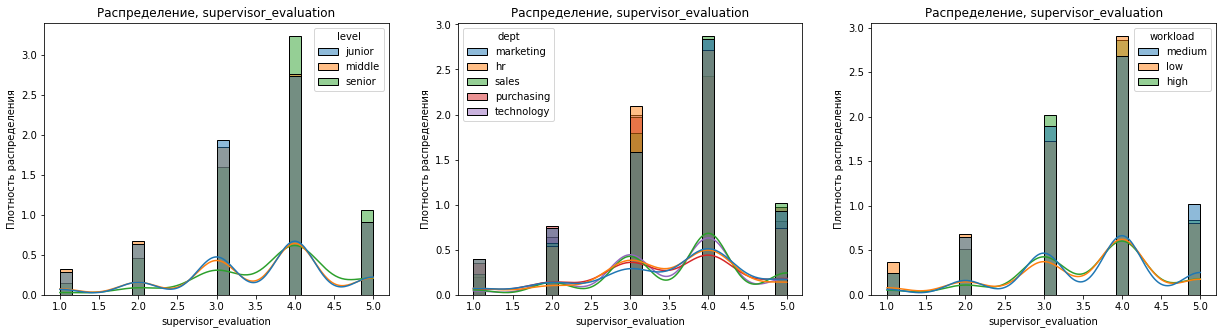

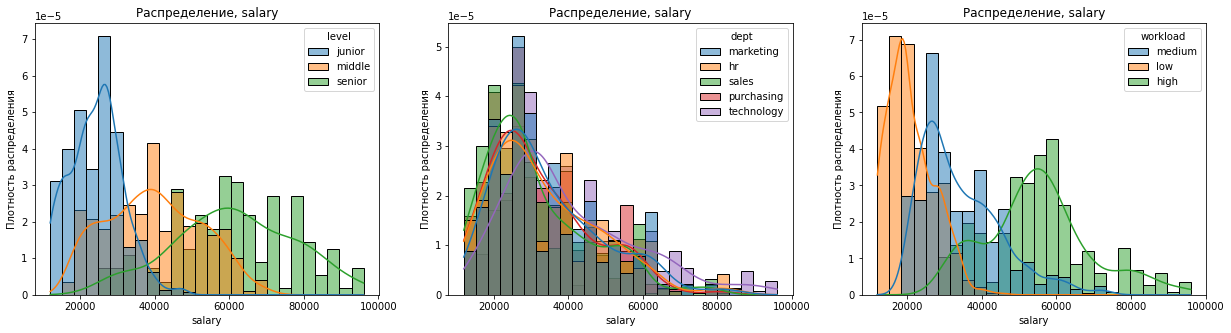

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [47]:
plots_hist(X_test2,filters ='level',filters1 ='dept',filters2 ='workload',legend=True);

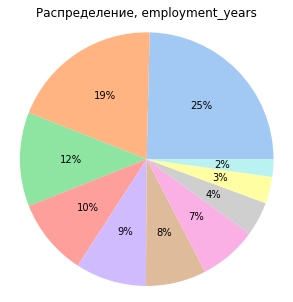

1     985
2     777
3     479
4     393
5     362
7     308
6     296
8     174
9     136
10     90
Name: employment_years, dtype: int64

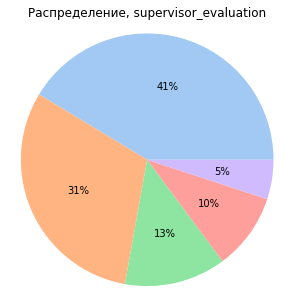

4    1654
3    1233
5     520
2     391
1     202
Name: supervisor_evaluation, dtype: int64

In [48]:
pies(train2);

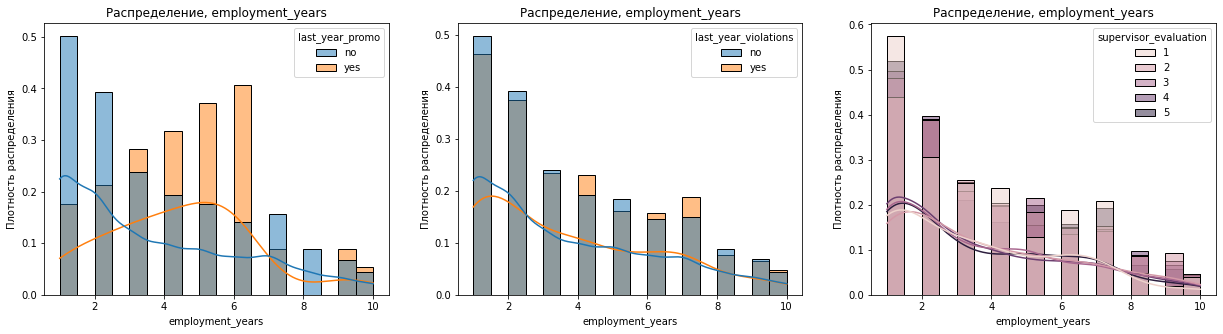

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


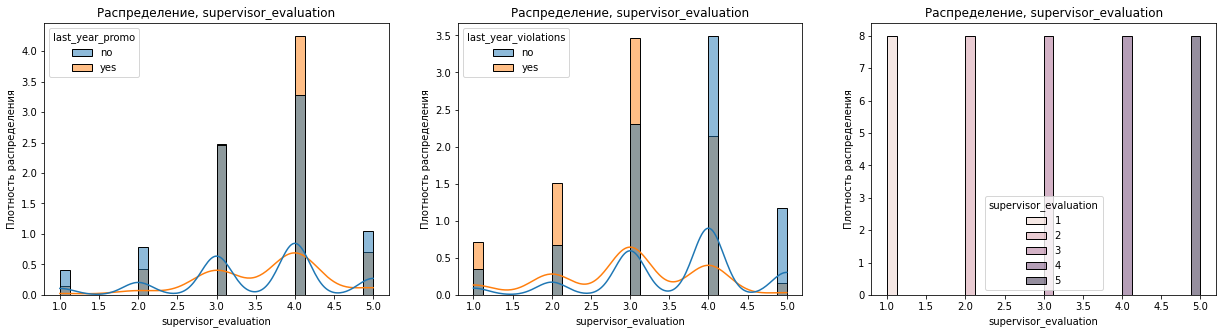

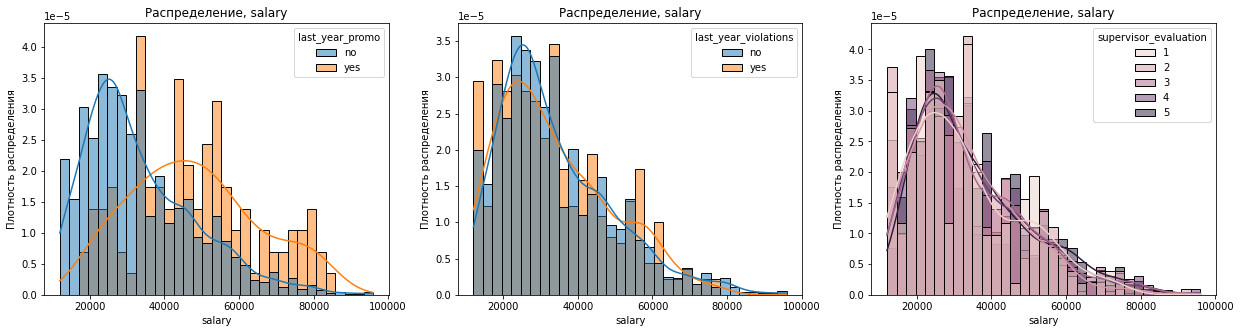

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [49]:
plots_hist(train2,filters ='last_year_promo',filters1 ='last_year_violations',filters2 ='supervisor_evaluation',legend=True);

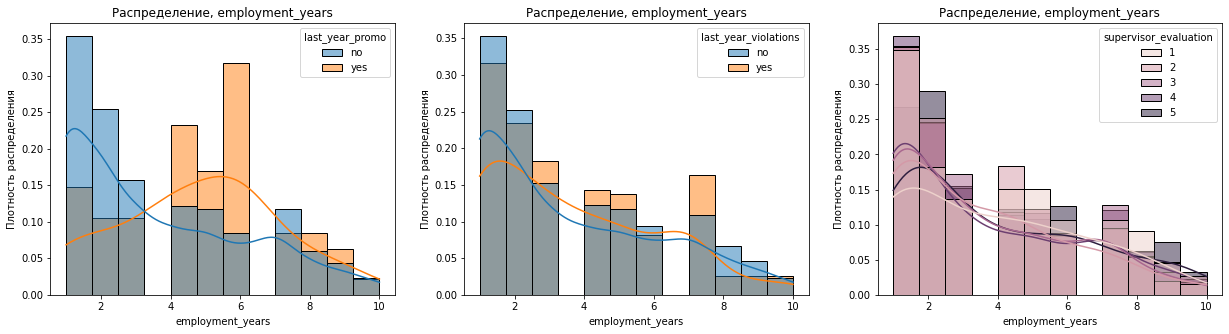

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


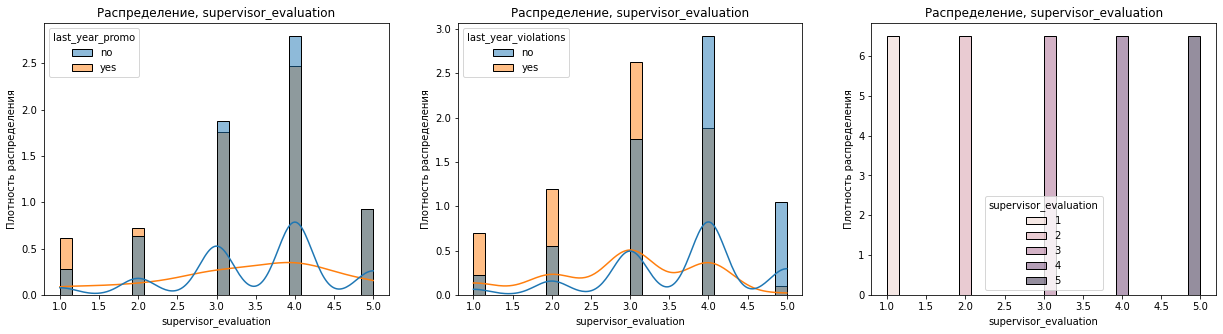

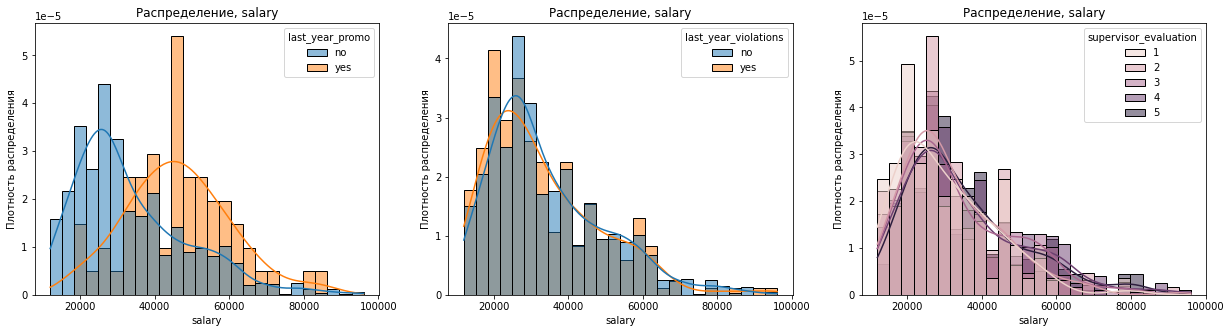

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [50]:
plots_hist(X_test2,filters ='last_year_promo',filters1 ='last_year_violations',filters2 ='supervisor_evaluation',legend=True);

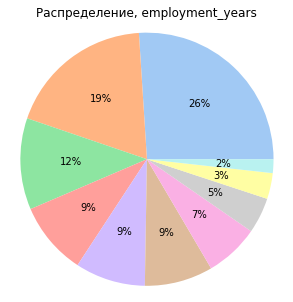

1     519
2     374
3     233
4     186
5     179
7     174
6     138
8      91
9      66
10     35
Name: employment_years, dtype: int64

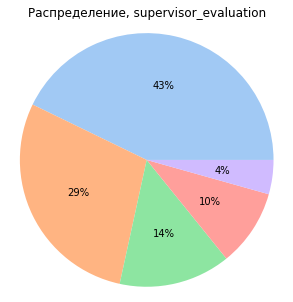

4    854
3    574
5    284
2    196
1     87
Name: supervisor_evaluation, dtype: int64

In [51]:
pies(X_test2);

#### Вывод ####
- Цветом выделил разные категории сотрудников: 
        - по отделам
        - по должности
        - по нагрузке
        - по повышению зарплаты
        - по оценке от работодателя
- видно что распределения в тренировочной и тестовой выборке также коррелируют и категории соответствуют друг другу


### Графики для категориальных данных ###

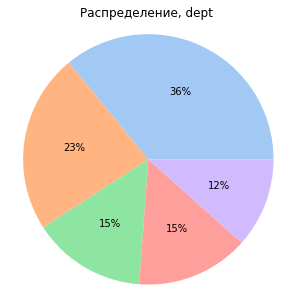

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

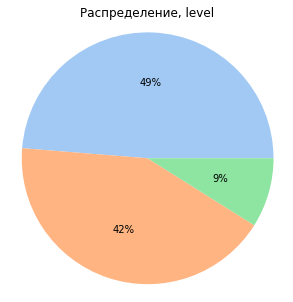

junior    1949
middle    1694
senior     357
Name: level, dtype: int64

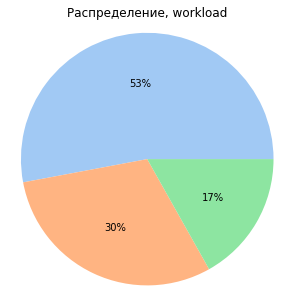

medium    2118
low       1208
high       674
Name: workload, dtype: int64

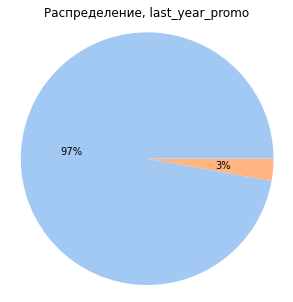

no     3887
yes     113
Name: last_year_promo, dtype: int64

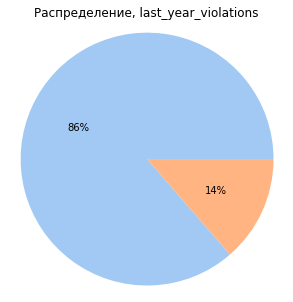

no     3455
yes     545
Name: last_year_violations, dtype: int64

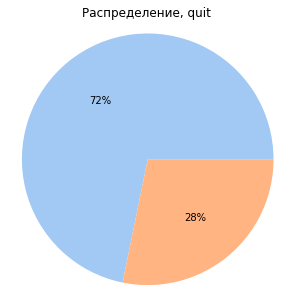

no     2872
yes    1128
Name: quit, dtype: int64

In [52]:
pie_plots(train2);

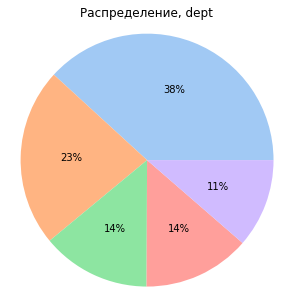

sales         762
technology    455
marketing     278
purchasing    273
hr            227
Name: dept, dtype: int64

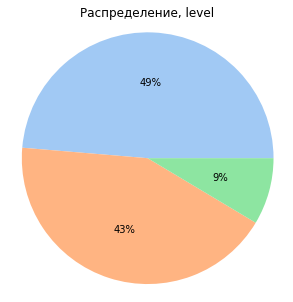

junior    971
middle    853
senior    171
Name: level, dtype: int64

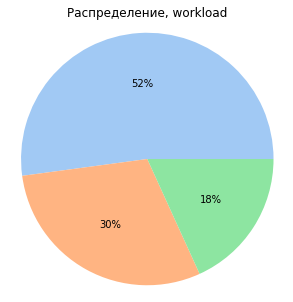

medium    1040
low        592
high       363
Name: workload, dtype: int64

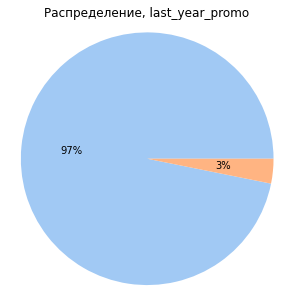

no     1932
yes      63
Name: last_year_promo, dtype: int64

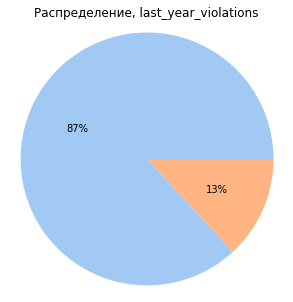

no     1733
yes     262
Name: last_year_violations, dtype: int64

In [53]:
pie_plots(X_test2);

#### Вывод ####


- Самый большой отдел продаж
- больше всего middle специалистов
- больше половины сотрудников имеют средний уровень нагрузки
- 4 процента сотрудников получают повышение
- чуть больше 18% сотрудников нарушают дисциплину


в тестовой выборке немного другая картина


- больше молодых мпециалистов
- 3 процента получают повышение
- 13 нарушают дисцилину



#### Фик матрица 

In [54]:
display(train2.phik_matrix(interval_cols=['salary']).style.background_gradient(cmap ='coolwarm'));

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.280300,0.000000
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.745104,0.312799
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.793876,0.132243
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.491915,0.659093
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.215043,0.157370
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.086087,0.185071
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.055330,0.245489
salary,0.280300,0.745104,0.793876,0.491915,0.215043,0.086087,0.055330,1.000000,0.564154
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.564154,1.000000


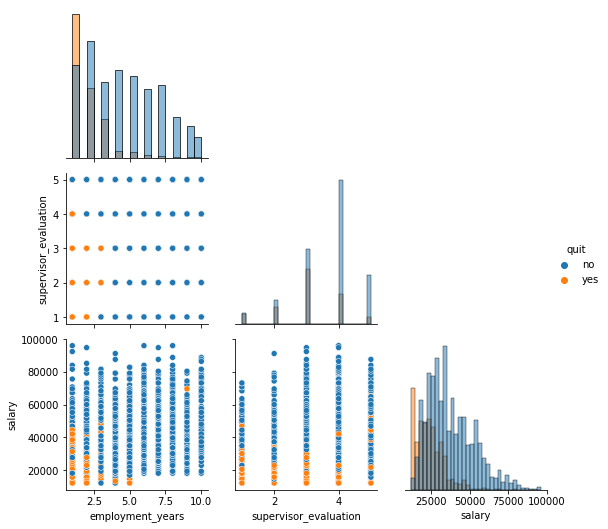

In [55]:
g = sns.PairGrid(train2, hue="quit",diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

#### Вывод ####
- имеем достаточно высокую связь уволнений с зарплатой и временем работы


- для стобцов employment_years, salary применим MinMaxScaler либо StandartScaler
- для столбцов supervisor_evaluation, level, workload  применим OrdinalEncoder
- для столбцов dept, last_year_promo, last_year_violations применим OneHotEncoder

### Портрет уволившегося сотрудника ###

In [56]:
table_quit = train2[train2.columns]
table_quit = table_quit.query('quit=="yes"')
display(table_quit.head(5))
;

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
257132,sales,junior,medium,2,no,yes,3,24000,yes
699916,sales,junior,low,1,no,yes,3,18000,yes
613206,technology,middle,medium,2,no,no,3,45600,yes
468145,technology,junior,medium,2,no,no,3,30000,yes
982346,marketing,junior,medium,3,no,no,3,30000,yes


''

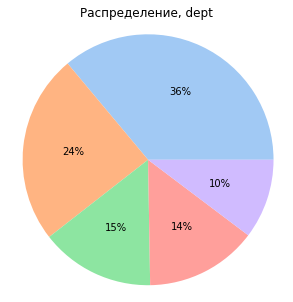

sales         407
technology    276
purchasing    166
marketing     163
hr            116
Name: dept, dtype: int64

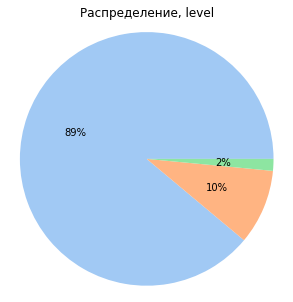

junior    1003
middle     108
senior      17
Name: level, dtype: int64

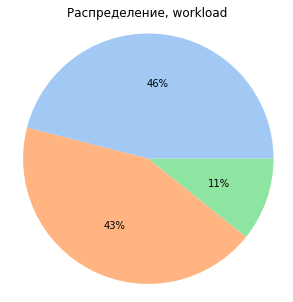

low       519
medium    488
high      121
Name: workload, dtype: int64

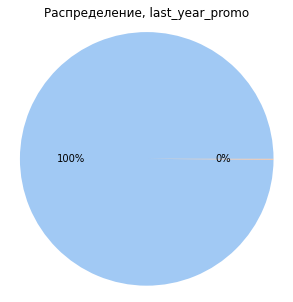

no     1127
yes       1
Name: last_year_promo, dtype: int64

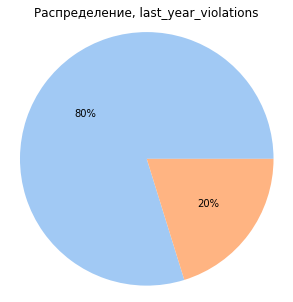

no     900
yes    228
Name: last_year_violations, dtype: int64

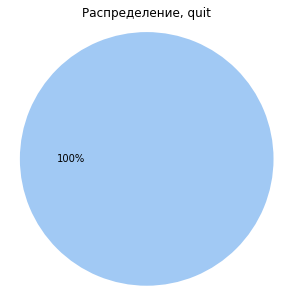

yes    1128
Name: quit, dtype: int64

''

In [57]:
pie_plots(table_quit)
;

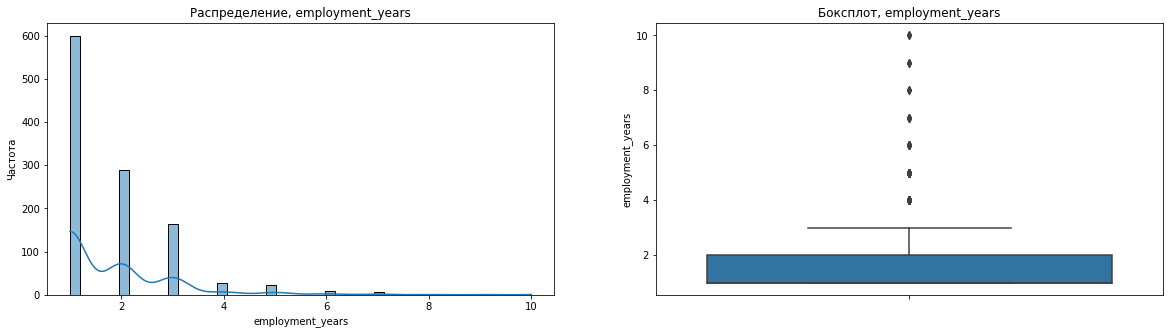

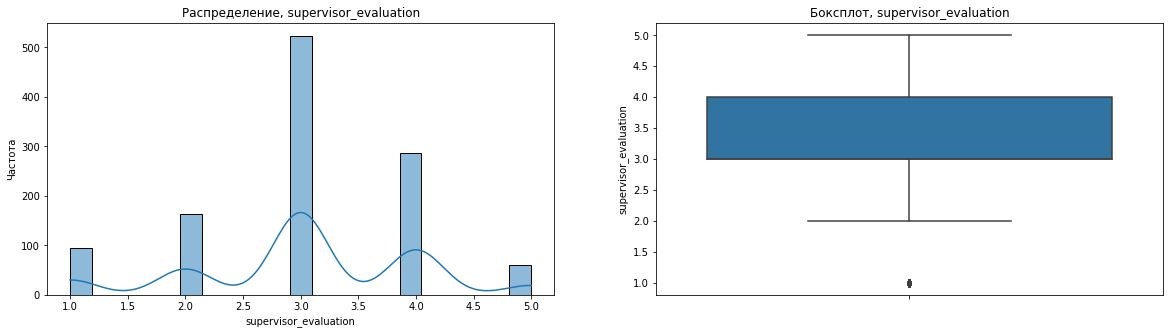

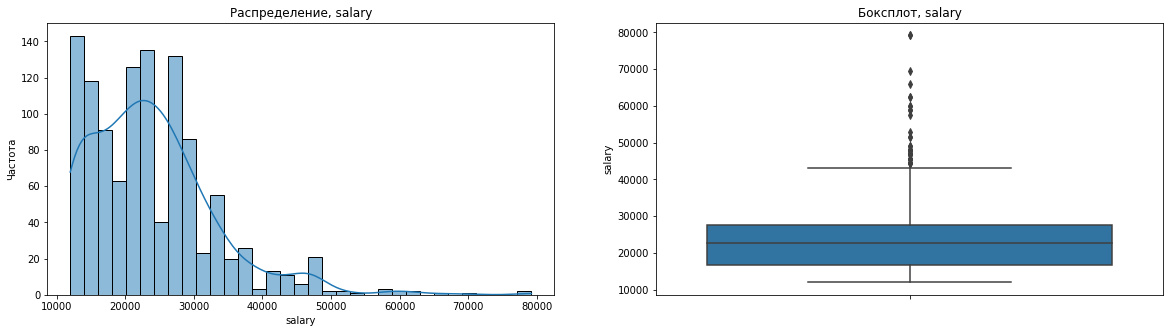

,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000
mean,1.844858,3.046099,23885.106383
std,1.274920,0.973291,9351.599505
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,16800.000000
50%,1.000000,3.000000,22800.000000
75%,2.000000,4.000000,27600.000000
max,10.000000,5.000000,79200.000000


In [58]:
plots(table_quit)

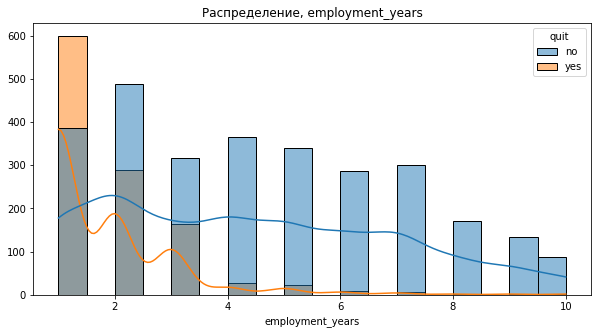

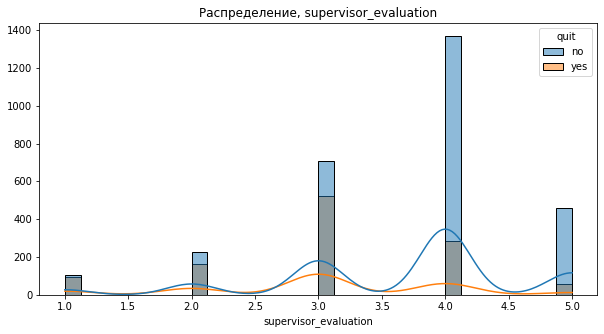

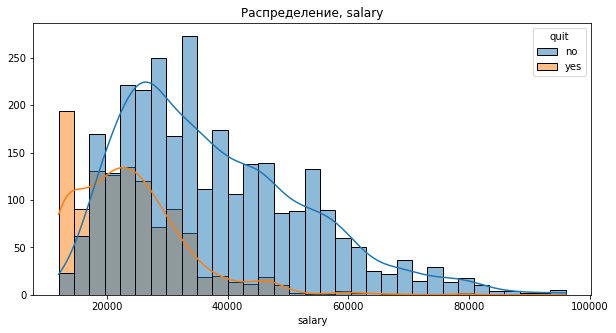

In [59]:
plot_hist(train2,'quit',legend=True);

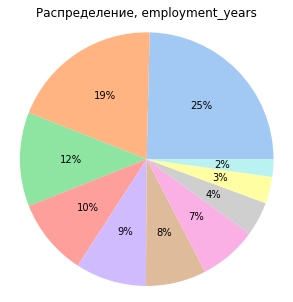

1     985
2     777
3     479
4     393
5     362
7     308
6     296
8     174
9     136
10     90
Name: employment_years, dtype: int64

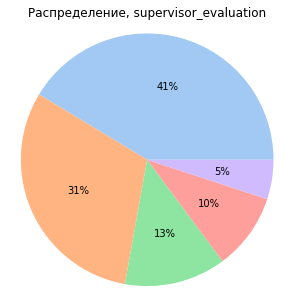

4    1654
3    1233
5     520
2     391
1     202
Name: supervisor_evaluation, dtype: int64

In [60]:
pies(train2);

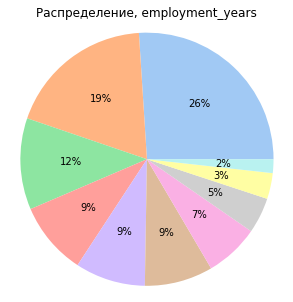

1     519
2     374
3     233
4     186
5     179
7     174
6     138
8      91
9      66
10     35
Name: employment_years, dtype: int64

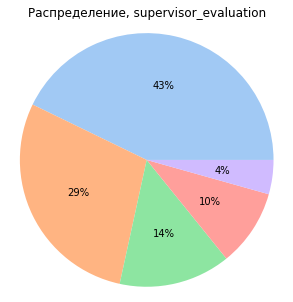

4    854
3    574
5    284
2    196
1     87
Name: supervisor_evaluation, dtype: int64

In [61]:
pies(X_test2);

In [62]:
display(train2.loc[train2['quit']=='yes'].describe());
display(train2.loc[train2['quit']=='no'].describe());

,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000
mean,1.844858,3.046099,23885.106383
std,1.274920,0.973291,9351.599505
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,16800.000000
50%,1.000000,3.000000,22800.000000
75%,2.000000,4.000000,27600.000000
max,10.000000,5.000000,79200.000000


,employment_years,supervisor_evaluation,salary
count,2872.000000,2872.000000,2872.000000
mean,4.430710,3.643106,37702.228412
std,2.544635,0.965295,15218.977339
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,25200.000000
50%,4.000000,4.000000,34800.000000
75%,6.000000,4.000000,46800.000000
max,10.000000,5.000000,96000.000000


#### Вывод ####

Уволившийся сотрудник:
- скорее всего работает в отделе продаж
- является молодым специалистом
- имеет невысокую или среднюю нагрузку
- не получает повышение
- довольно часто нарушает трудовую дисципоину
- работает менее 3 лет
- имеет среднюю оценку от своего работодателя
- зарплату в районе 25000

У тех кто увольняется зарплата почти в 25000 в среднем, у тех кто остался 40000 

### Сравнение распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников

In [63]:
y_test2 = y_test2.sort_index()
X_test2 = X_test2.sort_index()

In [64]:
X_test_with_rate = X_test2
X_test_with_rate['job_satisfaction_rate'] = y_test['job_satisfaction_rate']
X_test_with_rate['quit'] = y_test2['quit']

In [65]:
display(X_test_with_rate.head(5));

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.80,no
100480,marketing,junior,low,4,no,no,4,16800,0.84,no
100503,purchasing,middle,high,5,no,no,4,55200,0.79,no
100610,sales,middle,medium,5,no,no,4,43200,0.75,no
100692,sales,middle,high,6,no,no,4,48000,0.69,no


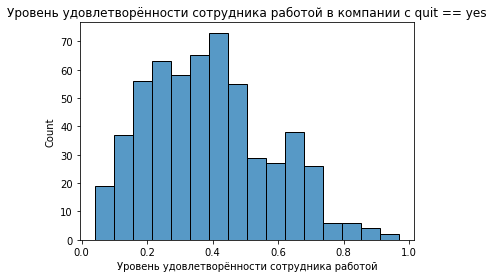

In [66]:
filter_hist(X_test_with_rate,target_fl='yes');

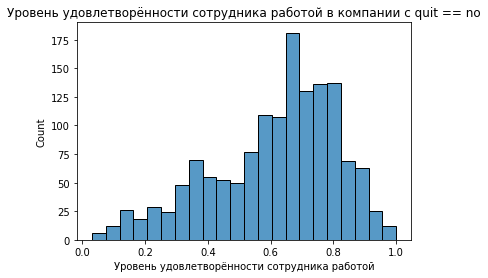

In [67]:
filter_hist(X_test_with_rate,target_fl='no');

In [68]:
display(X_test_with_rate.loc[X_test_with_rate['quit']=='yes']['job_satisfaction_rate'].describe());
display(X_test_with_rate.loc[X_test_with_rate['quit']=='no']['job_satisfaction_rate'].describe());

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64

count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

#### Вывод ####
- уровень удовлетворенности работой у уволившихся сотрудников в среднем от 0.387
- у оставшихся 0,612

- Это говорит о том что существует значительная корреляция междуудовлетворенностью работой и увольнением

## Добавление нового признака ##

In [69]:
train2['job_satisfaction_rate'] = grid_search.predict(train2.drop(['quit'], axis = 1))
X_test2['job_satisfaction_rate'] = grid_search.predict(X_test2)
display(X_test2.head(5))
;

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.820000,no
100480,marketing,junior,low,4,no,no,4,16800,0.852000,no
100503,purchasing,middle,high,5,no,no,4,55200,0.746667,no
100610,sales,middle,medium,5,no,no,4,43200,0.814000,no
100692,sales,middle,high,6,no,no,4,48000,0.712500,no


''

## Подготовка данных ##


### Категории признаков

In [70]:
train2.duplicated().sum()
train2 = train2.drop_duplicates()
train2.shape

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary', 'job_satisfaction_rate']
RANDOM_STATE = 42

y = train2['quit']
X = train2.drop(['quit'], axis = 1);

In [71]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

y_test2 = labelencoder.transform(y_test2)
y_test2

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 0, 0, ..., 1, 0, 1])

## Настройка финального пайплайна ##

In [72]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
]);

In [73]:
params = [ 
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth':  range(2, 13),
        'models__max_features': range(2, 23),
        'models__min_samples_leaf': range(2,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]   
    },
   {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
] ;

In [74]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    params, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X, y);

In [75]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке при кроссвалидации:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

In [76]:
randomized_search.best_score_

0.9039283527522708

In [77]:
y_predict_proba = randomized_search.predict_proba(X_test2)

In [78]:
roc_auc_score(y_test2, y_predict_proba[:, 1])

0.9216104624745649

In [79]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

print(dummy_clf.predict(X_test2))
print(y_test2.mean())
roc_auc_score(y_test2, dummy_clf.predict_proba(X_test2)[:,1])

[0 0 0 ... 0 0 0]
0.282


0.5

### Вывод ###
- Для предсказания уволится сотрудник или нет лучшая модель DecisionTreeClassifier(max_depth=9, max_features=11,min_samples_leaf=15,random_state=42)  
- метрика 0,92 для лучшей модели

Причина этого довольно простая , дерево решений отлично видит явные признаки, и может хорошо определять категории когда есть достаточно данных , при этом хорошо работает в случае нелинейных связей!

## Общий вывод ##

- При выполнении работы мы решили 2 основные задачи:
    - Задача №1: предсказание уровня удовлетворённости сотрудника
    - Задача 2: предсказание увольнения сотрудника из компании


- для решения этих задач выполнили загрузку данных, обработали, посмотрели с разных сторон, и подготовили к моделированию для предсказания целевого признака в обеих задач
- разделили признаки по категориям для правильной обработки и собрали пайплайн


- для решения первой задачи (задача регресии)создали метрику,  определили лучшую модель, DecisionTreeRegressor(min_samples_split=8, random_state=50)), метрика на тестовых данных 13.66
- для решения второй задачи (задача классификации) предсказания уволится сотрудник или нет лучшая модель DecisionTreeClassifier(max_depth=9, max_features=11,min_samples_leaf=15,random_state=42) метрика 0,92 для лучшей модели

Довольно интесресно посмотреть на наш целевой таргет, для этого обобщили данные

Уволившийся сотрудник:
- скорее всего работает в отделе продаж
- является молодым специалистом
- имеет невысокую или среднюю нагрузку
- не получает повышение
- довольно часто нарушает трудовую дисципоину
- работает менее 3 лет
- имеет среднюю оценку от своего работодателя
- зарплату в районе 25000

У тех кто увольняется зарплата почти в 2 раза ниже
    

Из этого можно сделать вывод о том, на что стоит обратить внимание работодателю

Работодателю стоит обратить внимание, ццвольняющиеся сотрудники мало мотирвированы работать, по многим причинам:
- необходимо мотивировать молодых специалистов, в первую очередь финансово
- очень маленький процент повышений
- возможно недогруженность также влияет на заинтересованность в работе,
- стоит разобраться в том почему такие сотрудники чаще нарушают дисциплину
- также необходимо чаще оценивать удовлетворенность сотрудника его положением и работой
        - это основной критерий который влияет на качество работы сотрудника
